In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [3]:
df= pd.read_csv('ev_charging_patterns.csv')

df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [4]:
df.dtypes

User ID                                      object
Vehicle Model                                object
Battery Capacity (kWh)                      float64
Charging Station ID                          object
Charging Station Location                    object
Charging Start Time                          object
Charging End Time                            object
Energy Consumed (kWh)                       float64
Charging Duration (hours)                   float64
Charging Rate (kW)                          float64
Charging Cost (USD)                         float64
Time of Day                                  object
Day of Week                                  object
State of Charge (Start %)                   float64
State of Charge (End %)                     float64
Distance Driven (since last charge) (km)    float64
Temperature (°C)                            float64
Vehicle Age (years)                         float64
Charger Type                                 object
User Type   

In [5]:
df.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

In [6]:
#splitting numerical and categorical cols:

num_cols=df.select_dtypes(include=[np.number]).columns
cat_cols=df.select_dtypes(exclude=[np.number]).columns

In [7]:
num_cols

Index(['Battery Capacity (kWh)', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'State of Charge (Start %)',
       'State of Charge (End %)', 'Distance Driven (since last charge) (km)',
       'Temperature (°C)', 'Vehicle Age (years)'],
      dtype='object')

In [8]:
cat_cols

Index(['User ID', 'Vehicle Model', 'Charging Station ID',
       'Charging Station Location', 'Charging Start Time', 'Charging End Time',
       'Time of Day', 'Day of Week', 'Charger Type', 'User Type'],
      dtype='object')

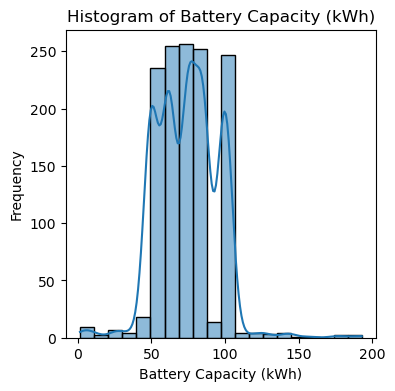

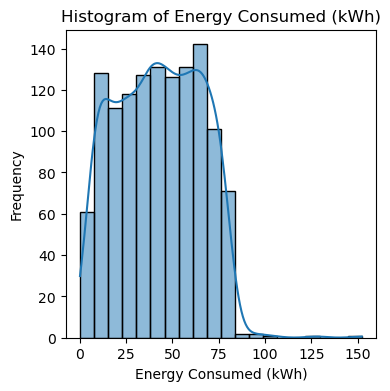

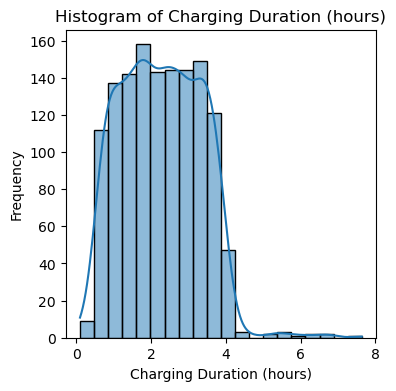

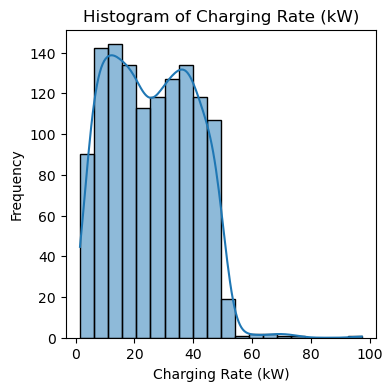

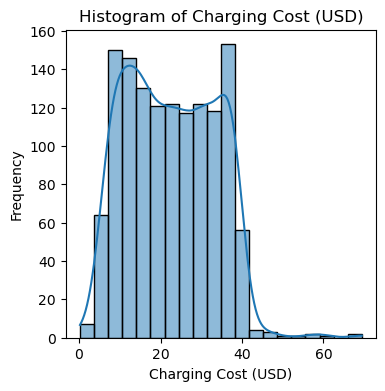

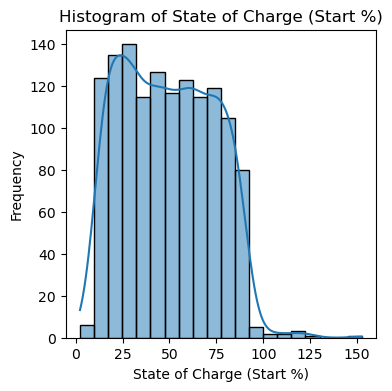

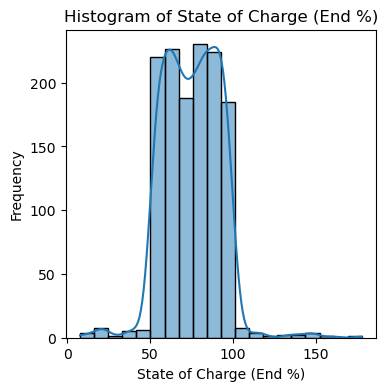

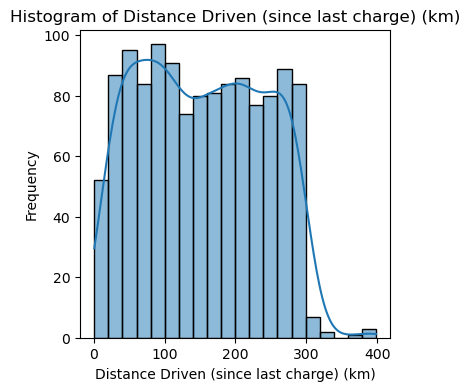

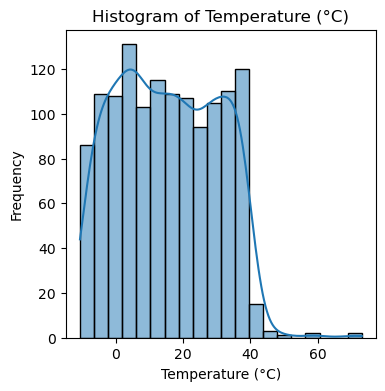

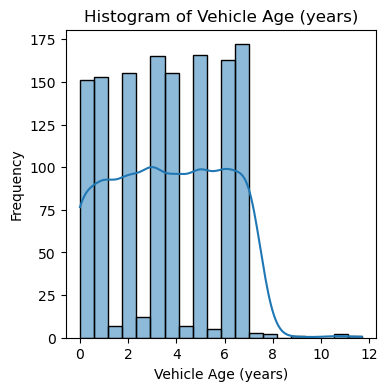

In [9]:
#only to check whether it is skewed data or not

for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(4,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [10]:
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [11]:
cat_imputer=SimpleImputer(strategy="most_frequent")

df[cat_cols]=cat_imputer.fit_transform(df[cat_cols])

In [12]:
# Encode categorical columns using Label encoder

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le


In [13]:
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,0,0,108.463007,301,1,0,0,60.712346,0.591363,36.389181,13.087717,1,5,29.371576,86.119962,293.602111,27.947953,2.0,0,1
1,432,2,100.000000,339,4,1,1,12.339275,3.133652,30.677735,21.128448,2,1,10.115778,84.664344,112.112804,14.311026,3.0,1,0
2,543,1,75.000000,83,4,2,2,19.128876,2.452653,27.513593,35.667270,2,4,6.854604,69.917615,71.799253,21.002002,2.0,2,1
3,654,2,50.000000,232,1,3,4,79.457824,1.266431,32.882870,13.036239,1,2,83.120003,99.624328,199.577785,38.316313,1.0,1,2
4,765,2,50.000000,9,2,4,3,19.629104,2.019765,10.215712,10.161471,2,2,54.258950,63.743786,203.661847,-7.834199,1.0,1,2
